<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/00_%EC%B5%9C%EC%A2%85_%ED%8C%8C%EC%82%B0%EC%9D%80%ED%96%89_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파산한 은행의 개수 계산하기

* 분기별로 파산한 은행이 얼마나 되는지 분석

In [ ]:
# 1. 파산한 은행 데이터 불러오기
banks_ready = pd.read_csv('https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/banklist.csv')
banks_ready.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [ ]:
# 2. 데이터 자료형 확인하기 
banks_ready.info()

## Closing Date, Updated Date 열의 자료형이 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [ ]:
# 3. 문자열로 저장된 두 열을 datetime 오브젝트로 변환
banks = pd.read_csv('data/banklist.csv', parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [ ]:
# 4. 은행이 파산한 연도와 분기 도출 
banks['closing_quarter'], banks['closing_year'] = ( banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year )
banks.loc[:,['Bank Name', 'Closing Date', 'closing_quarter', 'closing_year']]

## dt.quarter 메소드 : 분기 출력
## dt.year 메소드 : 연도 출력

,Bank Name,Closing Date,closing_quarter,closing_year
0,Fayette County Bank,2017-05-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",2017-05-05,2,2017
2,First NBC Bank,2017-04-28,2,2017
3,Proficio Bank,2017-03-03,1,2017
4,Seaway Bank and Trust Company,2017-01-27,1,2017
...,...,...,...,...
548,"Superior Bank, FSB",2001-07-27,3,2001
549,Malta National Bank,2001-05-03,2,2001
550,First Alliance Bank & Trust Co.,2001-02-02,1,2001
551,National State Bank of Metropolis,2000-12-14,4,2000


In [ ]:
# A. 연도별로 파산한 은행의 수
closing_y = banks.groupby(['closing_year']).size()
closing_y

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

In [ ]:
# B. 분기별 파산한 은행의 개수
closing_q = banks.groupby(['closing_quarter']).size()
closing_q

closing_quarter
1    135
2    138
3    153
4    127
dtype: int64

In [ ]:
# C. 연도별, 분기별 파산한 은행의 개수
closing_y_q = banks.groupby(['closing_year','closing_quarter']).size()
closing_y_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

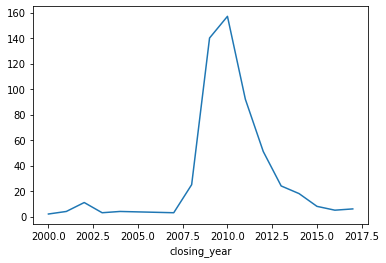

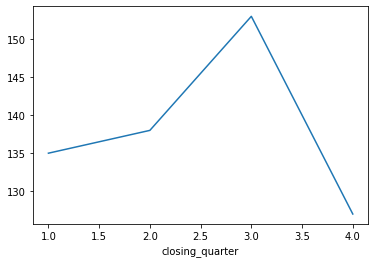

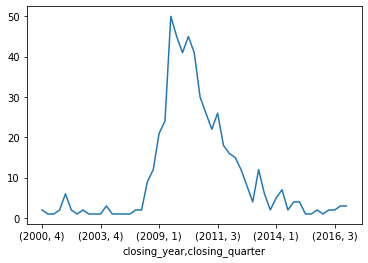

In [ ]:
import matplotlib.pyplot as plt

# B. 분기별
fig,ax = plt.subplots()
ax = closing_q.plot()
plt.show()

# A. 연도별
fig,ax = plt.subplots()
ax = closing_y.plot()
plt.show()

# C. (연도, 분기)별
fig,ax = plt.subplots()
ax = closing_y_q.plot()
plt.show()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


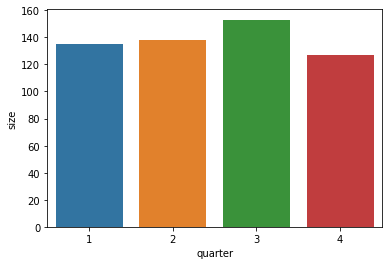

In [ ]:
# A. 분기별
closing_q = banks.groupby(['closing_quarter']).size()
q = closing_q.reset_index()
q.columns = ['quarter', 'size']
sns.barplot(q['quarter'], q['size'], data=q)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

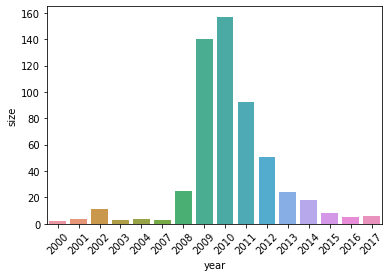

In [ ]:
# B. 연도별 
closing_y = banks.groupby(['closing_year']).size()
y = closing_y.reset_index()
y.columns = ['year', 'size']
sns.barplot(y['year'], y['size'], data=y)
plt.xticks(rotation=45)

In [ ]:
banks[banks['Bank Name'].str.contains('Washington Mutual')==True]
# 당시 미국 최대 저축은행 중 하나인 '워싱턴 뮤추얼'이 2008세계금융위기의 여파로 JP모건체이스에 넘어가 파산했다. 

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
513,Washington Mutual Bank (Including its subsidia...,Henderson,NV,32633,JP Morgan Chase Bank,2008-09-25,2015-08-04,3,2008
